<a href="https://colab.research.google.com/github/eiowolabi/Hackathons/blob/main/Shinakansen_Travel_Experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Loading necessary libraries
import numpy as np                              
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt     

# Slightly advanced library for data visualization            
import seaborn as sns                          

# Featauretools for feature engineering
import featuretools as ft

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings("ignore")

print(ft.__version__)
%load_ext autoreload
%autoreload 2

0.27.0
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#Loading the datasets
s_train = pd.read_csv('Surveydata_train.csv')
t_train = pd.read_csv('Traveldata_train.csv')
s_test = pd.read_csv('Surveydata_test.csv')
t_test = pd.read_csv('Traveldata_test.csv')

In [ ]:
#Viewing the dataset
s_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
t_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
print(s_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [ ]:
print(t_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB
None


In [ ]:
#Checking unique values in table columns
s_train.nunique()


ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64

In [ ]:
t_train.nunique()

ID                         94379
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
dtype: int64

In [ ]:
#merging two tables
train = pd.merge(s_train, t_train, on = 'ID')
train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

* Arrival_Time_Convenient,Catering, Onboard_entertainment, Online_Support, ease_of_Online_Booking, Onboard_Service, Legroom, Baggage_Handling, CheckIn_Service, Cleanliness, Online_Boarding, Gender, Customer_Type, Age, Type_Travel, Departure_Delay_in_Mins, Arrival_Delay_in_Mins all have null values

In [ ]:
#checking for duplicate values
train.duplicated().sum()

0

In [ ]:
#Check columns with missing values
round(train.isnull().sum() / train.isnull().count() * 100, 2)


ID                         0.00
Overall_Experience         0.00
Seat_Comfort               0.06
Seat_Class                 0.00
Arrival_Time_Convenient    9.46
Catering                   9.26
Platform_Location          0.03
Onboard_Wifi_Service       0.03
Onboard_Entertainment      0.02
Online_Support             0.10
Ease_of_Online_Booking     0.08
Onboard_Service            8.05
Legroom                    0.10
Baggage_Handling           0.15
CheckIn_Service            0.08
Cleanliness                0.01
Online_Boarding            0.01
Gender                     0.08
Customer_Type              9.48
Age                        0.03
Type_Travel                9.78
Travel_Class               0.00
Travel_Distance            0.00
Departure_Delay_in_Mins    0.06
Arrival_Delay_in_Mins      0.38
dtype: float64

In [ ]:
# fill category column missing values
for i in train.select_dtypes(exclude=[np.number]).columns:
 train[i].fillna(train[i].mode()[0], inplace=True)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94379 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  94379 non-null  object 
 5   Catering                 94379 non-null  object 
 6   Platform_Location        94379 non-null  object 
 7   Onboard_Wifi_Service     94379 non-null  object 
 8   Onboard_Entertainment    94379 non-null  object 
 9   Online_Support           94379 non-null  object 
 10  Ease_of_Online_Booking   94379 non-null  object 
 11  Onboard_Service          94379 non-null  object 
 12  Legroom                  94379 non-null  object 
 13  Baggage_Handling         94379 non-null  object 
 14  CheckIn_Service       

In [ ]:
for i in train.select_dtypes(include=[np.number]).columns:
 train[i].fillna(train[i].median().round(0), inplace=True)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94379 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  94379 non-null  object 
 5   Catering                 94379 non-null  object 
 6   Platform_Location        94379 non-null  object 
 7   Onboard_Wifi_Service     94379 non-null  object 
 8   Onboard_Entertainment    94379 non-null  object 
 9   Online_Support           94379 non-null  object 
 10  Ease_of_Online_Booking   94379 non-null  object 
 11  Onboard_Service          94379 non-null  object 
 12  Legroom                  94379 non-null  object 
 13  Baggage_Handling         94379 non-null  object 
 14  CheckIn_Service       

In [ ]:
train.describe()

,ID,Overall_Experience,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,9.437900e+04,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000
mean,9.884719e+07,0.546658,39.419850,1978.888185,14.638246,14.948463
std,2.724501e+04,0.497821,15.113993,1027.961019,38.128961,38.377695
min,9.880000e+07,0.000000,7.000000,50.000000,0.000000,0.000000
25%,9.882360e+07,0.000000,27.000000,1359.000000,0.000000,0.000000
50%,9.884719e+07,1.000000,40.000000,1923.000000,0.000000,0.000000
75%,9.887078e+07,1.000000,51.000000,2538.000000,12.000000,13.000000
max,9.889438e+07,1.000000,85.000000,6951.000000,1592.000000,1584.000000


* Age: 95% of customers are between 9 and 69yrs old. The youngest customer was 7yrs and the oldest customer was 85yrs
* Travel_Distance: 75% of distance travelled is less than 3000 miles. There seem to be outliers in this column
* Departure_Delay_in_Mins: About half of customers did not experience delay on the departure leg of the trip. There is significant outliers here as the average delay is 14 mins but  the maximum delay is 1,592 mins (26 hrs).
* Arrival_Delay_in_Mins: About half of customers did not experience delay on the arrival leg of the trip. There is significant outliers here as the average delay is 15 mins but  the maximum delay is 1,584 mins (26 hrs).

In [ ]:
print(train.describe(include=[np.object]).T)

                         count unique              top   freq
Seat_Comfort             94379      6       Acceptable  21219
Seat_Class               94379      2        Green Car  47435
Arrival_Time_Convenient  94379      6             Good  28504
Catering                 94379      6       Acceptable  27209
Platform_Location        94379      6       Manageable  24203
Onboard_Wifi_Service     94379      6             Good  22865
Onboard_Entertainment    94379      6             Good  30464
Online_Support           94379      6             Good  30107
Ease_of_Online_Booking   94379      6             Good  28982
Onboard_Service          94379      6             Good  34866
Legroom                  94379      6             Good  28960
Baggage_Handling         94379      5             Good  35086
CheckIn_Service          94379      6             Good  26579
Cleanliness              94379      6             Good  35433
Online_Boarding          94379      6             Good  25539
Gender  

In [ ]:
#drop ID column
train.drop("ID", axis=1, inplace=True) 

In [ ]:
train['Overall_Experience'].value_counts(normalize=True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

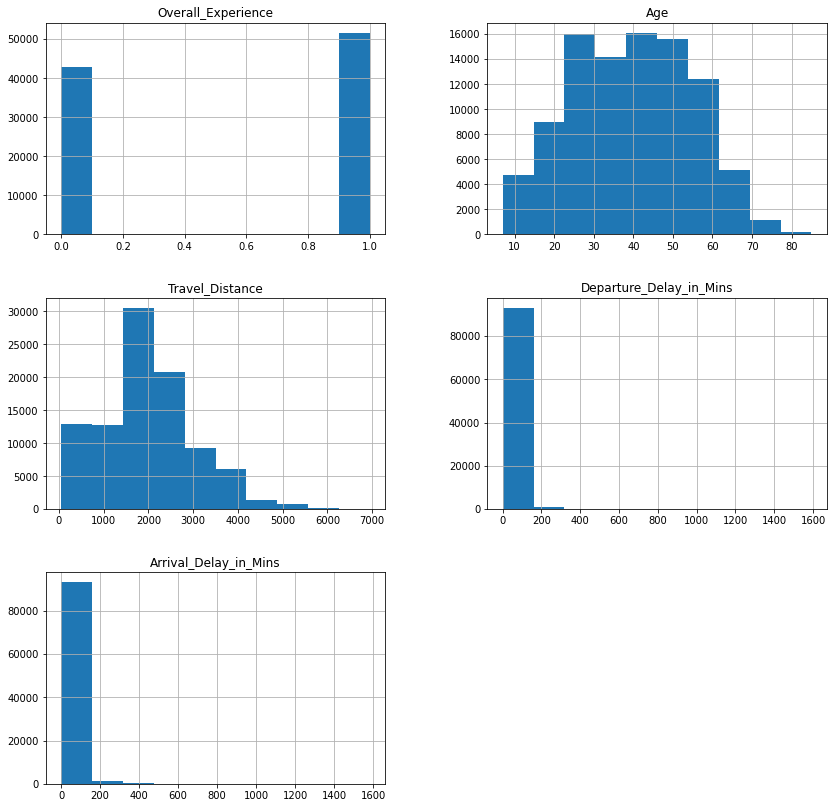

In [ ]:
# Creating numerical columns
train.select_dtypes(include=[np.number]).hist(figsize=(14,14))
plt.show()



* Age has a nearly normal distribution
* Travel distance is right skewed

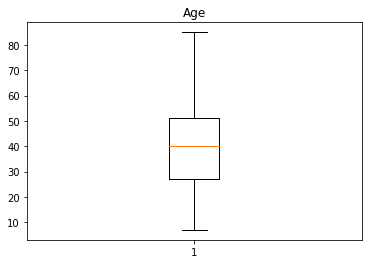

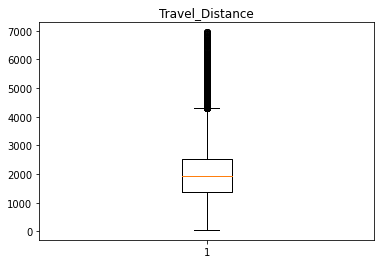

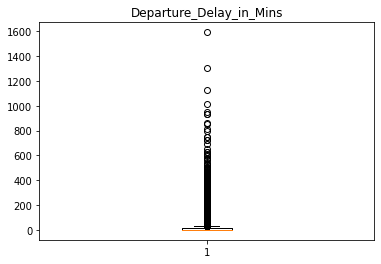

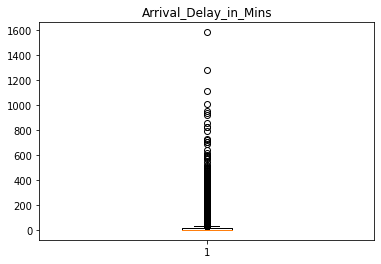

In [ ]:
for i in train.select_dtypes(include=[np.number]).columns:
  if i!='Overall_Experience':
      plt.boxplot(train[i])
      plt.title(i)
      plt.show()

In [ ]:
# Capping Departure Delay time, Arrival delay time and travel distance
# 99.7% of customers have Departure Delay time less than 129mins, Arrival delay time less than 130 
# and Departure Delay Time less than 5,062. We are going to capp this column values at this times
train['Departure_Delay_in_Mins']=train['Departure_Delay_in_Mins'].clip(train['Departure_Delay_in_Mins'].min(),30)
train['Arrival_Delay_in_Mins']=train['Arrival_Delay_in_Mins'].clip(train['Arrival_Delay_in_Mins'].min(),30)
train['Travel_Distance']=train['Travel_Distance'].clip(train['Travel_Distance'].min(),4500)


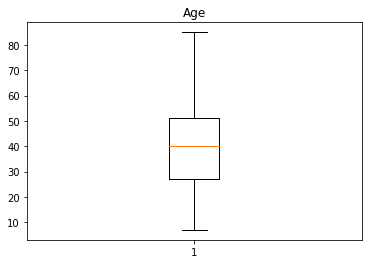

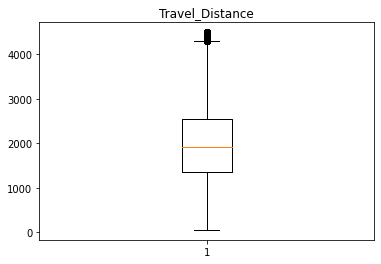

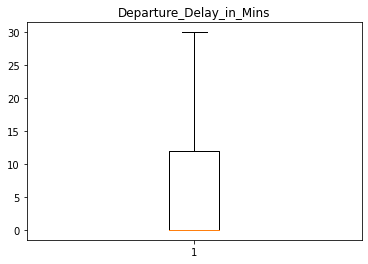

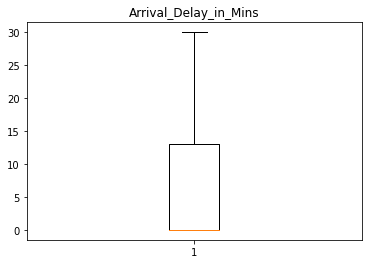

In [ ]:
for i in train.select_dtypes(include=[np.number]).columns:
  if i!='Overall_Experience':
    plt.boxplot(train[i])
    plt.title(i)
    plt.show()

Seat_Comfort
Seat_Class
Arrival_Time_Convenient
Catering
Platform_Location
Onboard_Wifi_Service
Onboard_Entertainment
Online_Support
Ease_of_Online_Booking
Onboard_Service
Legroom
Baggage_Handling
CheckIn_Service
Cleanliness
Online_Boarding
Gender
Customer_Type
Type_Travel
Travel_Class


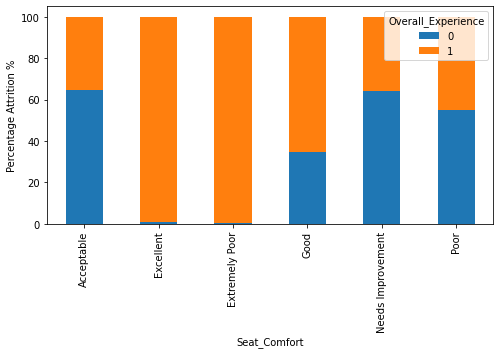

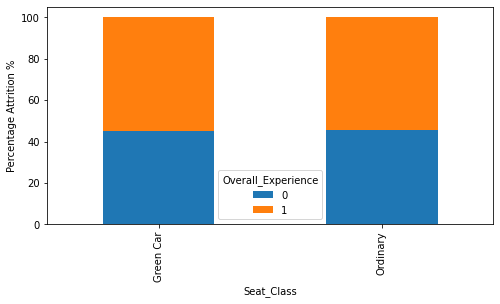

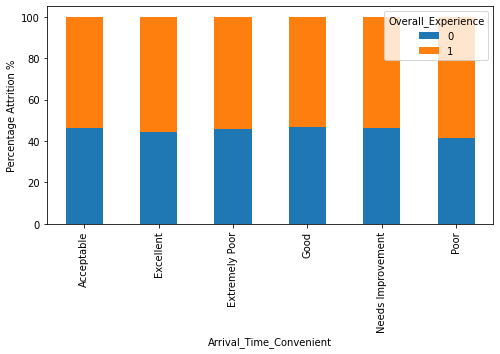

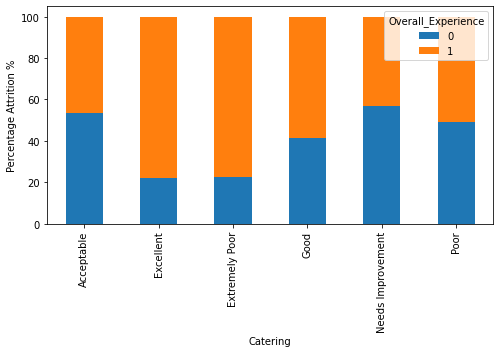

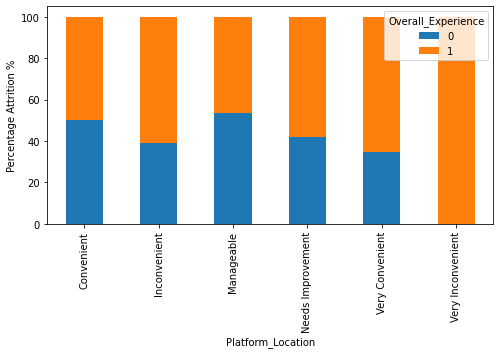

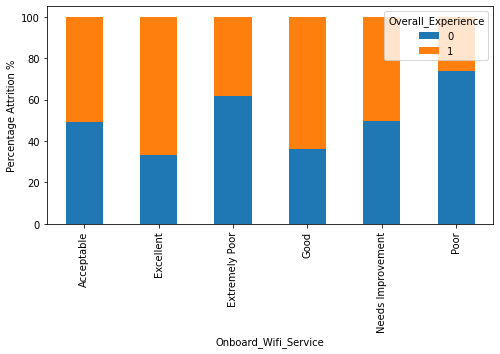

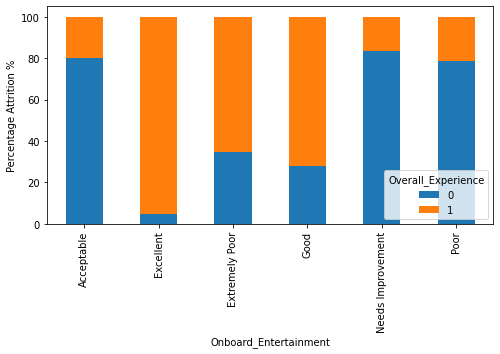

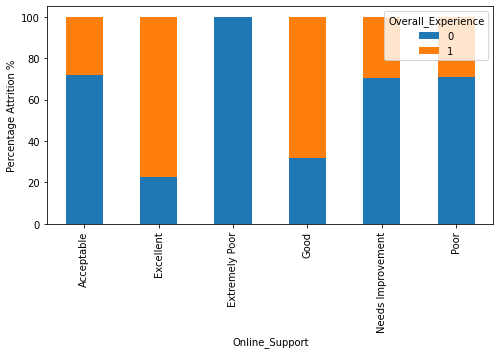

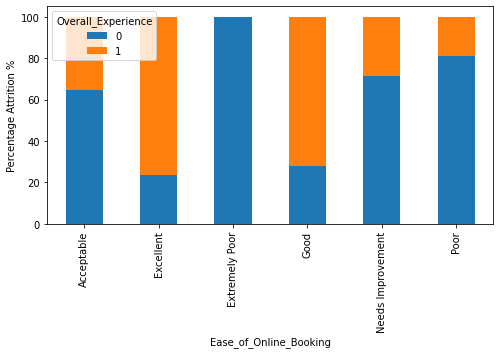

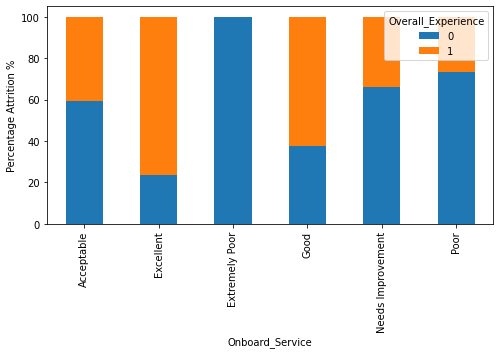

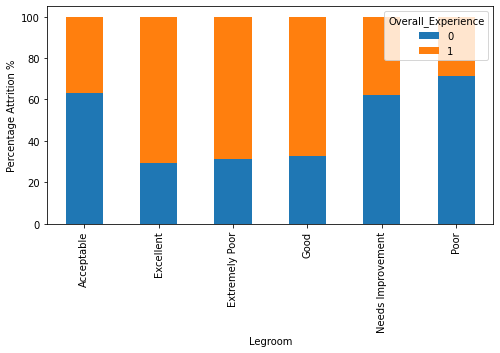

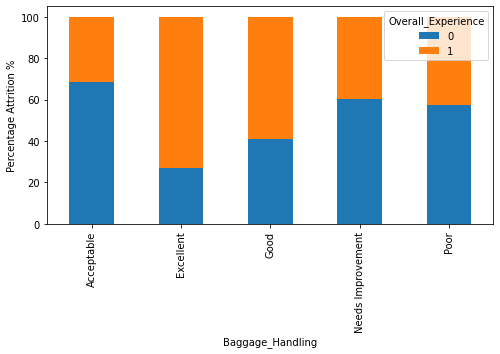

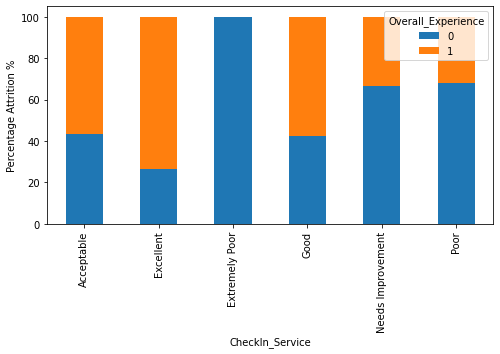

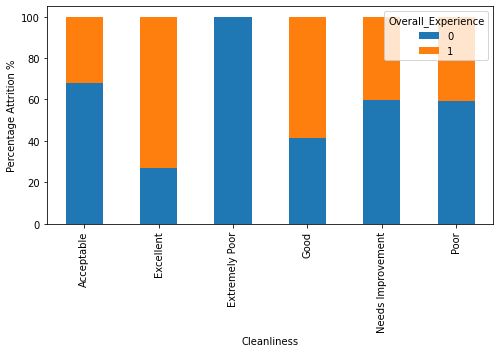

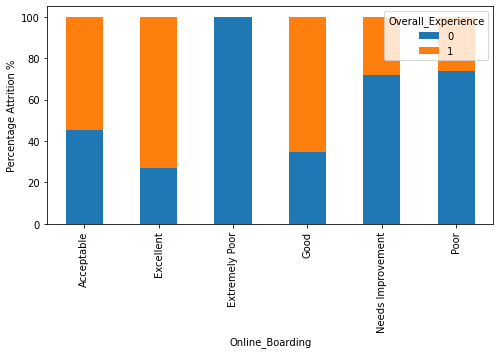

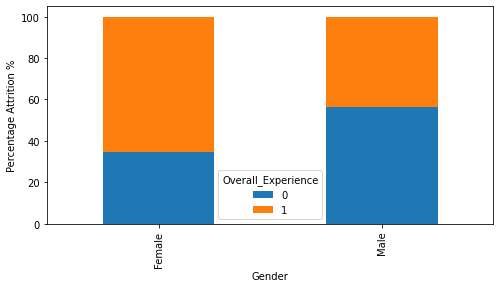

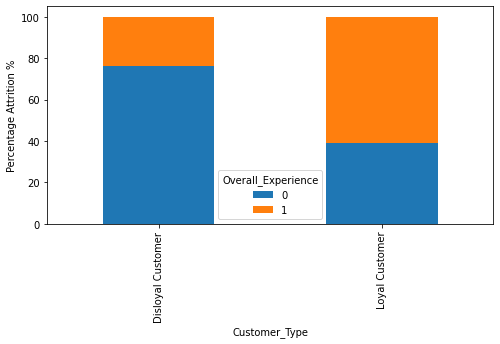

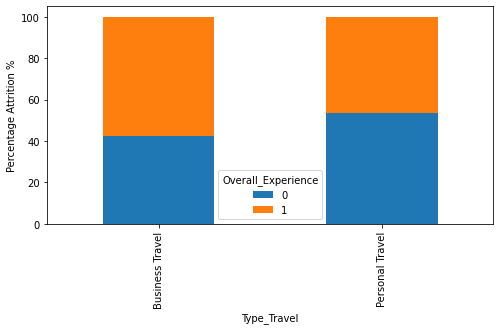

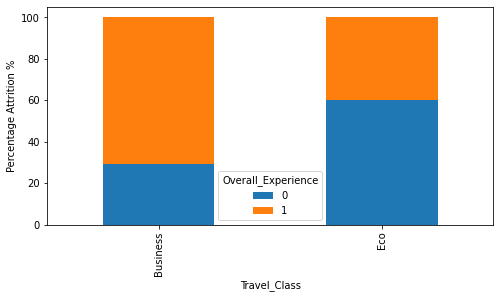

In [ ]:
# Creating categorical variables 
for i in train.select_dtypes(exclude=[np.number]).columns:
    print(i)
    (pd.crosstab(train[i],train['Overall_Experience'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
    plt.ylabel('Percentage Attrition %')

In [ ]:
#columns to exclude
# ['Arrival_Delay_in_Mins', 'Seat_Class', 'Arrival_Time_Convenient']
train = train.drop(columns = ['Arrival_Delay_in_Mins', 'Seat_Class', 'Arrival_Time_Convenient'])

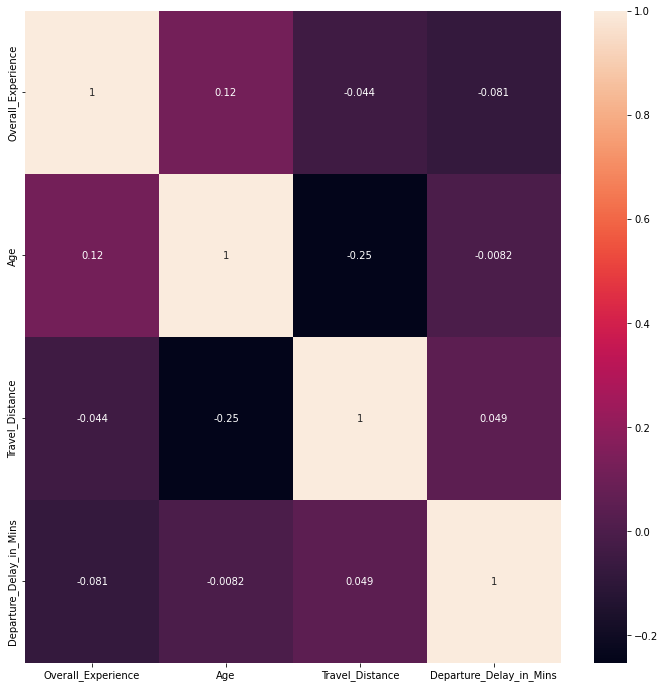

In [ ]:
#Find correlation between columns

plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot = True)

# display the plot
plt.show()

In [ ]:
train.shape

(94379, 21)

In [ ]:
# Creating list of dummy columns
to_get_dummies_for = train.select_dtypes(exclude=[np.number]).columns

# Creating dummy variables
df = pd.get_dummies(data = train, columns = to_get_dummies_for, drop_first = True) 

df.head()

,Overall_Experience,Age,Travel_Distance,Departure_Delay_in_Mins,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Catering_Excellent,...,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco
0,0,52.0,272,0.0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
1,0,48.0,2200,9.0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,1,1,1
2,1,43.0,1061,30.0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,44.0,780,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,50.0,1981,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
Y= df.Overall_Experience
X= df.drop(columns = ['Overall_Experience'])

In [ ]:
X.shape

(94379, 71)

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [ ]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#### Logistic Regression Model ####

In [ ]:
# Fitting logistic regression model

lg=LogisticRegression()
lg.fit(X_train_scaled,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     29950
           1       0.91      0.90      0.91     36115

    accuracy                           0.90     66065
   macro avg       0.90      0.90      0.90     66065
weighted avg       0.90      0.90      0.90     66065



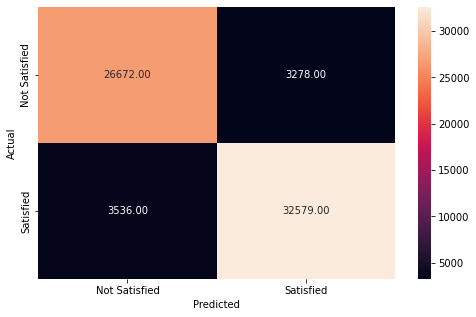

In [ ]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train_scaled)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     12836
           1       0.91      0.90      0.91     15478

    accuracy                           0.90     28314
   macro avg       0.90      0.90      0.90     28314
weighted avg       0.90      0.90      0.90     28314



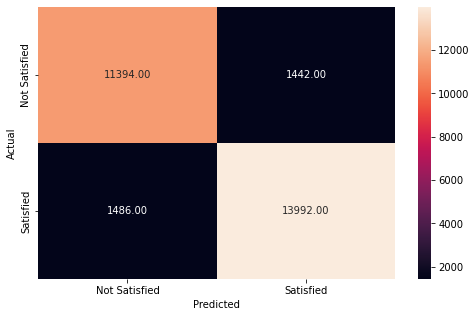

In [ ]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

In [ ]:
# Printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by = 0,ascending = False)

,0
Seat_Comfort_Extremely Poor,2.344743
Seat_Comfort_Excellent,1.894039
Onboard_Entertainment_Excellent,1.312181
Onboard_Entertainment_Good,0.896948
Customer_Type_Loyal Customer,0.819024
...,...
Ease_of_Online_Booking_Needs Improvement,-0.328468
Travel_Class_Eco,-0.463587
Type_Travel_Personal Travel,-0.498039
Gender_Male,-0.503628


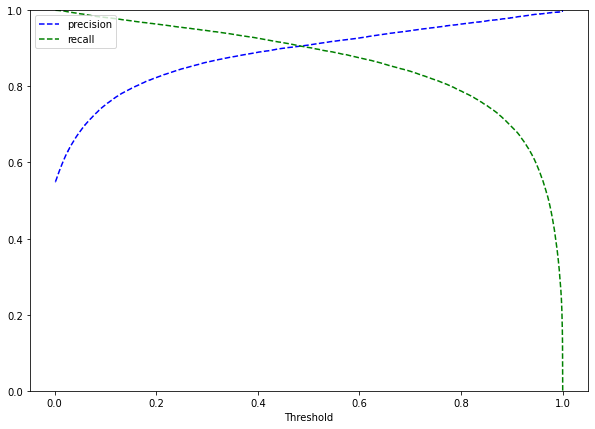

In [ ]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train_scaled)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [ ]:
for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i]==recalls_lg[i]:
        print(thresholds_lg[i])

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     29950
           1       0.91      0.90      0.91     36115

    accuracy                           0.90     66065
   macro avg       0.90      0.90      0.90     66065
weighted avg       0.90      0.90      0.90     66065



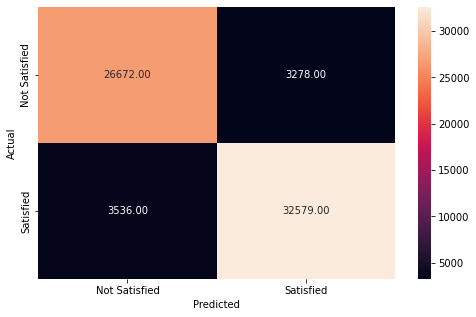

In [ ]:
optimal_threshold=.5
y_pred_train = lg.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     12836
           1       0.91      0.90      0.91     15478

    accuracy                           0.90     28314
   macro avg       0.90      0.90      0.90     28314
weighted avg       0.90      0.90      0.90     28314



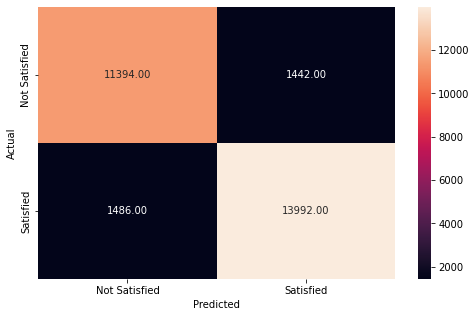

In [ ]:
optimal_threshold=.5
y_pred_test = lg.predict_proba(X_test_scaled)

metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

#### SVM ####

In [ ]:
# To Speed-Up SVM training.

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)
X_test_scaled2 = scaling.transform(df_test)

##### Linear Kernel #####

In [ ]:
# Fitting SVM
svm = SVC(kernel='linear') # Linear kernal or linear decision boundary
model = svm.fit(X= X_train_scaled, y = y_train)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     29950
           1       0.91      0.91      0.91     36115

    accuracy                           0.90     66065
   macro avg       0.90      0.90      0.90     66065
weighted avg       0.90      0.90      0.90     66065



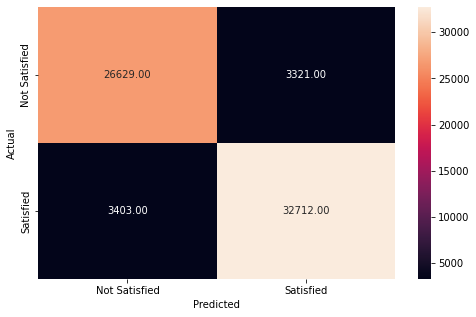

In [ ]:
y_pred_train_svm = model.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12836
           1       0.91      0.91      0.91     15478

    accuracy                           0.90     28314
   macro avg       0.90      0.90      0.90     28314
weighted avg       0.90      0.90      0.90     28314



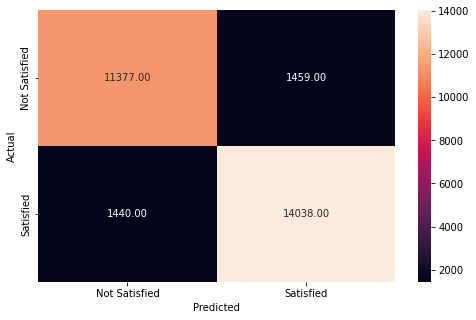

In [ ]:
# Checking performance on the test data
y_pred_test_svm = model.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_svm)

##### RBF Kernel #####

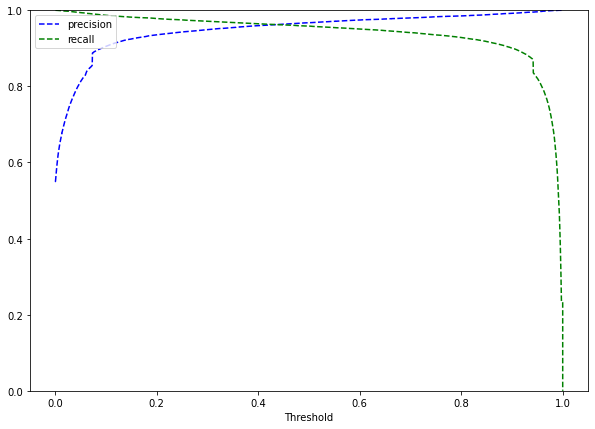

In [ ]:
svm_rbf=SVC(kernel='rbf',probability=True)
# Fit the model
svm_rbf.fit(X_train_scaled,y_train)
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [ ]:
for i in np.arange(len(thresholds_svm)):
    if precisions_svm[i]==recalls_svm[i]:
        print(thresholds_svm[i])

0.43592927953734567


              precision    recall  f1-score   support

           0       0.95      0.96      0.95     29950
           1       0.96      0.96      0.96     36115

    accuracy                           0.96     66065
   macro avg       0.96      0.96      0.96     66065
weighted avg       0.96      0.96      0.96     66065



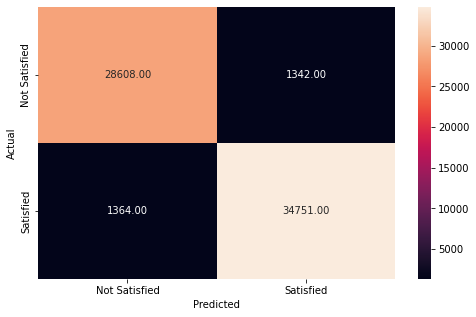

In [ ]:
optimal_threshold_svm=.44
y_pred_train = svm_rbf.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold_svm)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     12836
           1       0.95      0.95      0.95     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



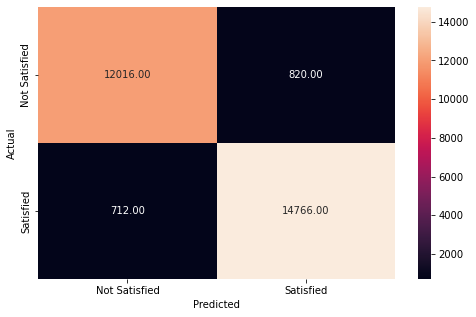

In [ ]:
optimal_threshold_svm=.44
y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

#### Decision Tree ####

In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.45, 1: 0.55}, random_state = 1)

In [ ]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.45, 1: 0.55}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



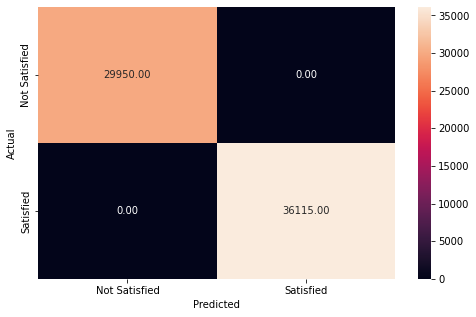

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     12836
           1       0.93      0.93      0.93     15478

    accuracy                           0.92     28314
   macro avg       0.92      0.92      0.92     28314
weighted avg       0.92      0.92      0.92     28314



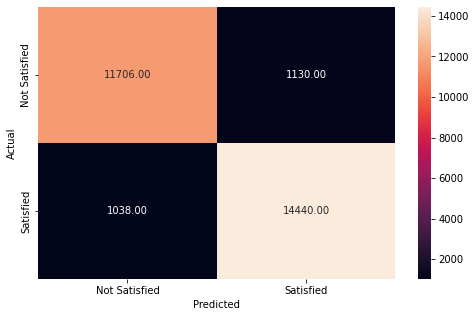

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

<AxesSubplot:xlabel='Importance'>

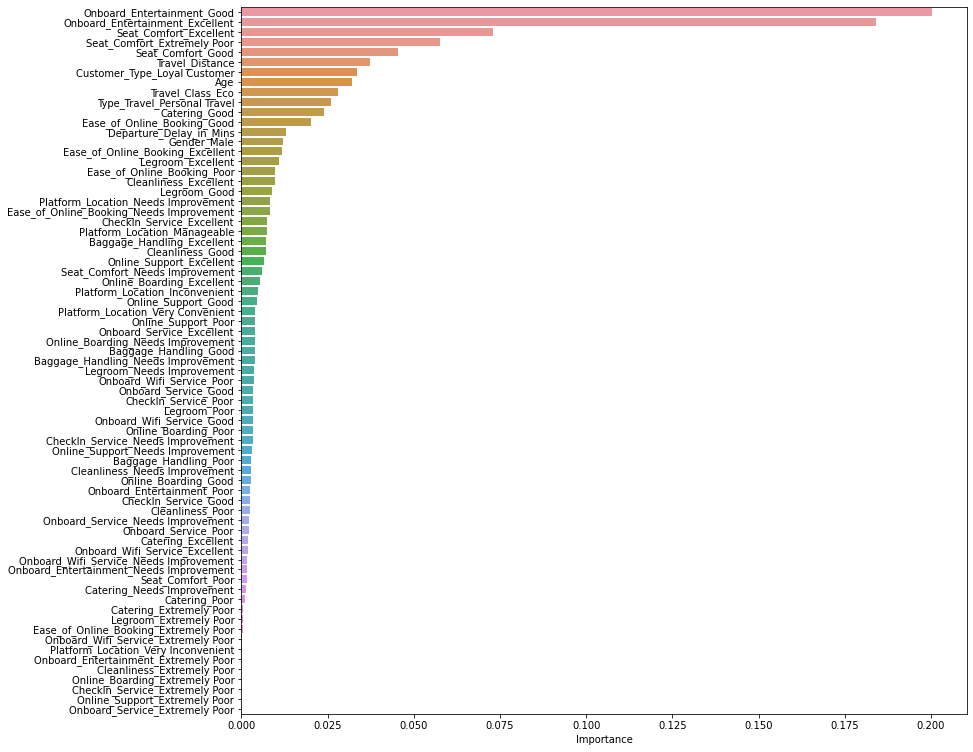

In [ ]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

##### Random Forest #####

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.45, 1: 0.55}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.45, 1: 0.55}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



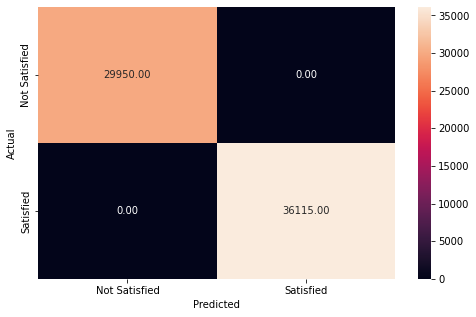

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     12836
           1       0.96      0.95      0.95     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



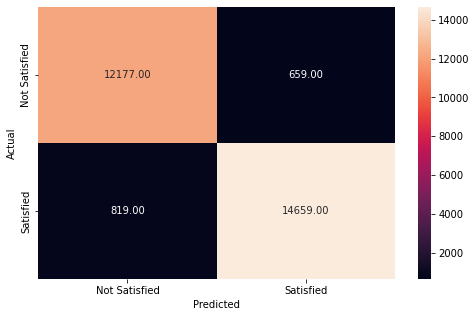

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

<AxesSubplot:xlabel='Importance'>

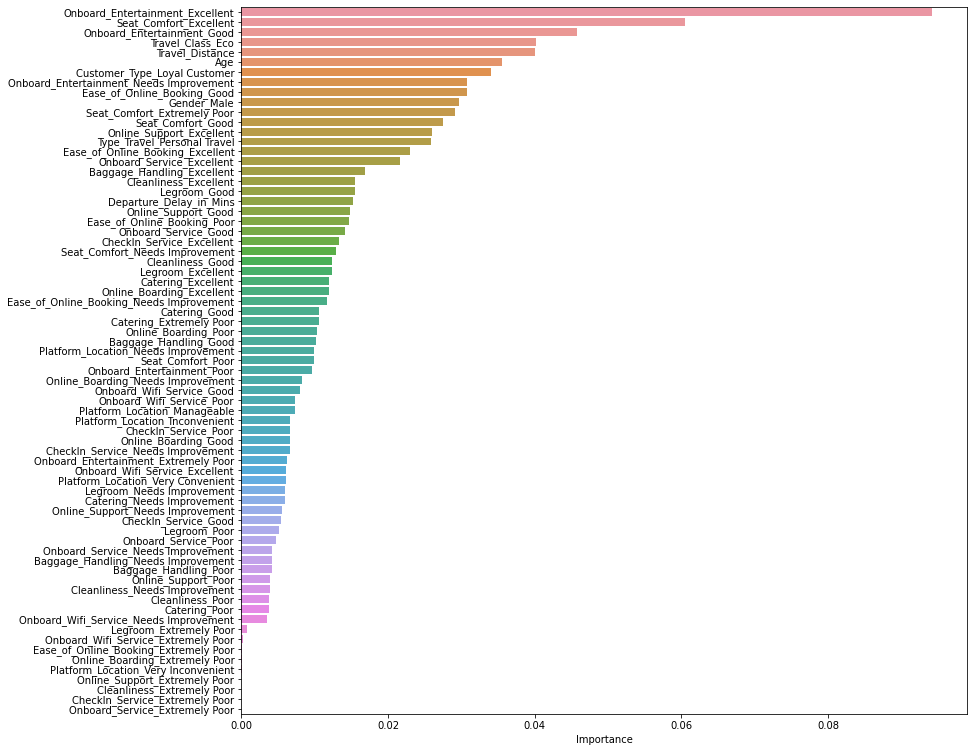

In [ ]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

### GridSearchCV ###

In [ ]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.45, 1: 0.55}, random_state = 1)

# Grid of parameters to choose from
parameters = parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.45, 1: 0.55}, criterion='entropy',
                       max_depth=5, min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     29950
           1       0.86      0.90      0.88     36115

    accuracy                           0.87     66065
   macro avg       0.87      0.86      0.87     66065
weighted avg       0.87      0.87      0.87     66065



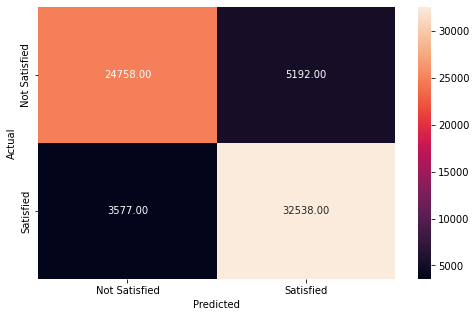

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84     12836
           1       0.85      0.90      0.88     15478

    accuracy                           0.86     28314
   macro avg       0.86      0.86      0.86     28314
weighted avg       0.86      0.86      0.86     28314



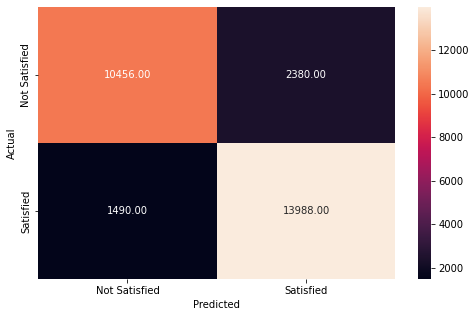

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.45, 1: 0.55}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.45, 1: 0.55}, min_samples_leaf=3,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     29950
           1       0.98      0.98      0.98     36115

    accuracy                           0.97     66065
   macro avg       0.97      0.97      0.97     66065
weighted avg       0.97      0.97      0.97     66065



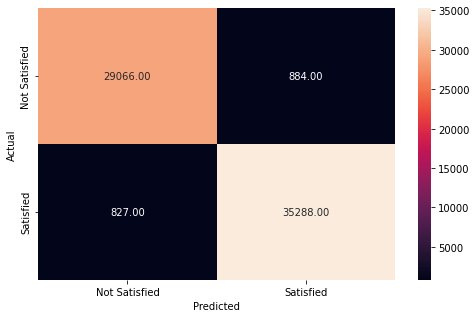

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     12836
           1       0.94      0.95      0.95     15478

    accuracy                           0.94     28314
   macro avg       0.94      0.94      0.94     28314
weighted avg       0.94      0.94      0.94     28314



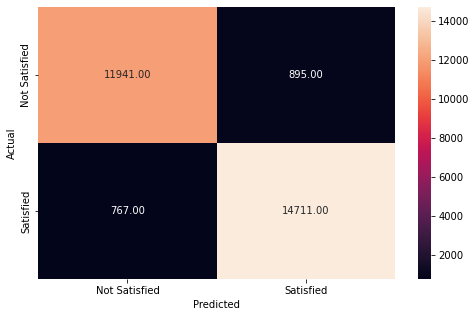

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

                 model     score
0  Logistic Regression  0.453345
1        Decision Tree  0.923430
2        Random Forest  0.947800
3     Decision Tree CV  0.863318
4     Random Forest CV  0.941301


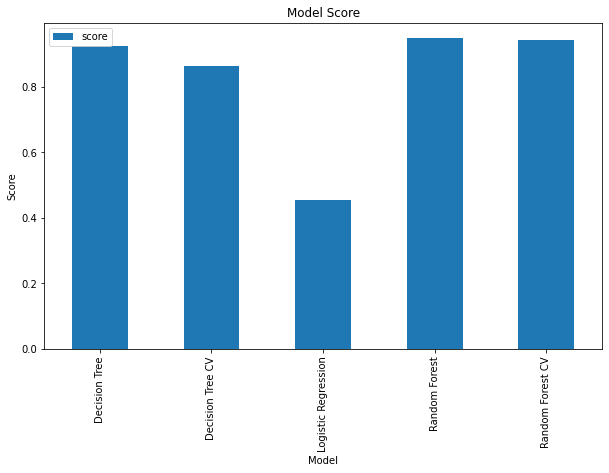

In [ ]:
models = {}

# Let's initial the launch_dict with each value to be an empty list
models['Logistic Regression'] = [lg.score(X_test, y_test)]
#models['SVM'] = [svm.score(X_test, y_test)]
#models['SVM RBF'] = [svm_rbf.score(X_test, y_test)]
models['Decision Tree'] = [dt.score(X_test, y_test)]
models['Random Forest'] = [rf_estimator.score(X_test, y_test)]
models['Decision Tree CV'] = [dtree_estimator.score(X_test, y_test)]
models['Random Forest CV'] = [rf_estimator_tuned.score(X_test, y_test)]

#into dataframe
dfs=pd.DataFrame(models)
dfs=dfs.transpose()
dfs.reset_index(inplace=True)
dfs.rename(columns={'index':'model', 0:'score'}, inplace=True)
print(dfs)

# barplot
df_bar = dfs.groupby("model").mean()[["score"]]

df_bar.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Model') # add to x-label to the plot
plt.ylabel('Score') # add y-label to the plot
plt.title('Model Score') # add title to the plot

plt.show()

### Processing Test Data ###

In [ ]:
test = pd.merge(s_test, t_test, on = 'ID')
test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,...,Excellent,Poor,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,...,Excellent,Acceptable,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,...,Needs Improvement,Excellent,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,...,Excellent,Poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,...,Excellent,Excellent,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


In [ ]:
test.duplicated().sum()

0

In [ ]:
# fill category column missing values
for i in test.select_dtypes(exclude=[np.number]).columns:
 test[i].fillna(test[i].mode()[0], inplace=True)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_Comfort             35602 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_Time_Convenient  35602 non-null  object 
 4   Catering                 35602 non-null  object 
 5   Platform_Location        35602 non-null  object 
 6   Onboard_Wifi_Service     35602 non-null  object 
 7   Onboard_Entertainment    35602 non-null  object 
 8   Online_Support           35602 non-null  object 
 9   Ease_of_Online_Booking   35602 non-null  object 
 10  Onboard_Service          35602 non-null  object 
 11  Legroom                  35602 non-null  object 
 12  Baggage_Handling         35602 non-null  object 
 13  CheckIn_Service          35602 non-null  object 
 14  Cleanliness           

In [ ]:
for i in test.select_dtypes(include=[np.number]).columns:
 test[i].fillna(test[i].median().round(1), inplace=True)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_Comfort             35602 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_Time_Convenient  35602 non-null  object 
 4   Catering                 35602 non-null  object 
 5   Platform_Location        35602 non-null  object 
 6   Onboard_Wifi_Service     35602 non-null  object 
 7   Onboard_Entertainment    35602 non-null  object 
 8   Online_Support           35602 non-null  object 
 9   Ease_of_Online_Booking   35602 non-null  object 
 10  Onboard_Service          35602 non-null  object 
 11  Legroom                  35602 non-null  object 
 12  Baggage_Handling         35602 non-null  object 
 13  CheckIn_Service          35602 non-null  object 
 14  Cleanliness           

In [ ]:
#Save IDs
ids = test['ID']
#drop ID column
test.drop("ID", axis=1, inplace=True) 

In [ ]:
# Capping Departure Delay time, Arrival delay time and travel distance
# 99.7% of customers have Departure Delay time less than 129mins, Arrival delay time less than 130 
# and Departure Delay Time less than 5,062. We are going to capp this column values at this times
test['Departure_Delay_in_Mins']=test['Departure_Delay_in_Mins'].clip(test['Departure_Delay_in_Mins'].min(),30)
test['Arrival_Delay_in_Mins']=test['Arrival_Delay_in_Mins'].clip(test['Arrival_Delay_in_Mins'].min(),30)
test['Travel_Distance']=test['Travel_Distance'].clip(test['Travel_Distance'].min(),4500)


In [ ]:
test = test.drop(columns = ['Arrival_Delay_in_Mins', 'Seat_Class', 'Arrival_Time_Convenient'])

# Creating list of dummy columns
to_get_dummies = test.select_dtypes(exclude=[np.number]).columns

# Creating dummy variables
df_test = pd.get_dummies(data = test, columns = to_get_dummies, drop_first = True) 

df_test.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Catering_Excellent,Catering_Extremely Poor,...,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco
0,36.0,532,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,21.0,1425,9.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60.0,2832,0.0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
3,29.0,1352,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
4,18.0,1610,17.0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
# Get missing columns in the training test
missing_cols = set(X.columns ) - set( df_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    df_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
df_test = df_test[X.columns]

df_test.shape

(35602, 71)

In [ ]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled2=sc.transform(df_test)
X_test_scaled2=pd.DataFrame(X_test_scaled2, columns=X.columns)

In [ ]:
predlg = lg.predict(X_test_scaled2)
predsvm = model.predict(X_test_scaled2)
predsvm_rbf = svm_rbf.predict(X_test_scaled2)
preddt = dt.predict(X_test_scaled2)
predrf = rf_estimator.predict(X_test_scaled2)
preddt_cv = dtree_estimator.predict(X_test_scaled2)
predrf_cv = rf_estimator_tuned.predict(X_test_scaled2)

In [ ]:
# Logisitic Regression
pred = {}

# Let's initial the launch_dict with each value to be an empty list
pred['ID'] = ids
pred['Overall_Experience'] = predlg


dt_predlg=pd.DataFrame(pred)
print(dt_predlg.head())

dt_predlg.to_csv('logistic_regression_model.csv', index=False)

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


In [ ]:
# SVM
pred = {}

# Let's initial the launch_dict with each value to be an empty list
pred['ID'] = ids
pred['Overall_Experience'] = predsvm


dt_predsvm=pd.DataFrame(pred)
print(dt_predsvm.head())

dt_predsvm.to_csv('svm_model.csv', index=False)

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


In [ ]:
# SVM_RBF
pred = {}

# Let's initial the launch_dict with each value to be an empty list
pred['ID'] = ids
pred['Overall_Experience'] = predsvm_rbf


dt_predsvmrbf=pd.DataFrame(pred)
print(dt_predsvmrbf.head())

dt_predsvmrbf.to_csv('svm_rbf_model.csv', index=False)

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


In [ ]:
# Decision Tree
pred = {}

# Let's initial the launch_dict with each value to be an empty list
pred['ID'] = ids
pred['Overall_Experience'] = preddt


dt_preddt=pd.DataFrame(pred)
print(dt_preddt.head())

dt_preddt.to_csv('Decision_Tree_model.csv', index=False)

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


In [ ]:
# Random Forest
pred = {}

# Let's initial the launch_dict with each value to be an empty list
pred['ID'] = ids
pred['Overall_Experience'] = predrf


dt_predrf=pd.DataFrame(pred)
print(dt_predrf.head())

dt_predrf.to_csv('random_forest_model.csv', index=False)

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


In [ ]:
# Decision Tree CV
pred = {}

# Let's initial the launch_dict with each value to be an empty list
pred['ID'] = ids
pred['Overall_Experience'] = preddt_cv


dt_preddtcv=pd.DataFrame(pred)
print(dt_preddtcv.head())

dt_preddtcv.to_csv('Decision_Tree_GridCV_model.csv', index=False)

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


In [ ]:
# Random Forest CV
pred = {}

# Let's initial the launch_dict with each value to be an empty list
pred['ID'] = ids
pred['Overall_Experience'] = predrf_cv


dt_predrfcv=pd.DataFrame(pred)
print(dt_predrfcv.head())

dt_predrfcv.to_csv('random_forest_GridCV_model.csv', index=False)

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


In [ ]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.
     ------------------------------------ 444.0/444.0 MB 116.2 kB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 168.1 kB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 143.2 kB/s eta 0:00:00



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 896.4/896.4 kB 176.1 kB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 136.7 kB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 137.6 kB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 177.1 kB/s eta 0:00:00
     -------------------------------------- 14.2/14.2 MB 137.9 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 127.5 kB/s eta 0:00:00
     ------------------------------------ 123.4/123.4 kB 164.4 kB/s eta 0:00:00
     -------------------------------------- 42.6/42.6 kB 231.0 kB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 135.5 kB/s eta 0:00:00
     ------------------------------------ 438.7/438.7 kB 244.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 781.3/781.3 kB 96.6 kB/s eta 0:00:00
     -------------

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [ ]:
# We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_1.add(Dense(128, activation='relu', input_shape=(71,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function will give the probability of students getting admitted into UCLA  
model_1.add(Dense(1, activation='sigmoid'))

In [ ]:
model_1.compile(loss = 'binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               9216      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_1 = model_1.fit(X_train_scaled, 
                    y_train,
                    validation_split=0.1, 
                    epochs=150, 
                    verbose=2)

Epoch 1/150
1859/1859 - 6s - loss: 0.2751 - accuracy: 0.8824 - val_loss: 0.2040 - val_accuracy: 0.9121 - 6s/epoch - 3ms/step
Epoch 2/150
1859/1859 - 5s - loss: 0.1953 - accuracy: 0.9184 - val_loss: 0.1666 - val_accuracy: 0.9292 - 5s/epoch - 3ms/step
Epoch 3/150
1859/1859 - 4s - loss: 0.1700 - accuracy: 0.9289 - val_loss: 0.1563 - val_accuracy: 0.9329 - 4s/epoch - 2ms/step
Epoch 4/150
1859/1859 - 5s - loss: 0.1551 - accuracy: 0.9347 - val_loss: 0.1481 - val_accuracy: 0.9366 - 5s/epoch - 3ms/step
Epoch 5/150
1859/1859 - 5s - loss: 0.1468 - accuracy: 0.9383 - val_loss: 0.1432 - val_accuracy: 0.9375 - 5s/epoch - 3ms/step
Epoch 6/150
1859/1859 - 4s - loss: 0.1391 - accuracy: 0.9416 - val_loss: 0.1378 - val_accuracy: 0.9387 - 4s/epoch - 2ms/step
Epoch 7/150
1859/1859 - 4s - loss: 0.1337 - accuracy: 0.9430 - val_loss: 0.1398 - val_accuracy: 0.9389 - 4s/epoch - 2ms/step
Epoch 8/150
1859/1859 - 4s - loss: 0.1280 - accuracy: 0.9458 - val_loss: 0.1350 - val_accuracy: 0.9420 - 4s/epoch - 2ms/step


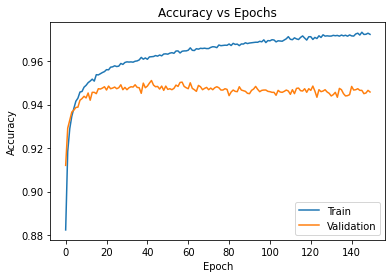

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
model_1.evaluate(X_test_scaled, y_test, verbose = 1)

885/885 [==============================] - 3s 3ms/step - loss: 0.1387 - accuracy: 0.9483


[0.13865667581558228, 0.9482588171958923]

In [ ]:
preddl = np.round(model_1.predict(X_test_scaled2)).astype('int')
preddl[0:5]

1113/1113 [==============================] - 4s 3ms/step


array([[1],
       [1],
       [1],
       [0],
       [1]])

In [ ]:
# Deep Learning 1
pred = {}

# Let's initial the launch_dict with each value to be an empty list
pred['ID'] = ids
pred['Overall_Experience'] = list(np.concatenate(preddl.tolist()). flat)


dt_preddl=pd.DataFrame(pred)
print(dt_preddl.head())

dt_preddl.to_csv('Deep Learning 1.csv', index=False)

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
model_2 = Sequential()
model_2.add(Dense(128, activation='tanh', input_shape=(71,)))
model_2.add(Dropout(0.1))
model_2.add(Dense(64, activation='tanh'))
model_2.add(Dropout(0.1))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
model_2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9216      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,585
Trainable params: 19,585
Non-traina

In [ ]:
history_2 = model_2.fit(X_train_scaled, 
                    y_train, 
                    validation_split=0.1, 
                    epochs=100, 
                    verbose=2)

Epoch 1/100
1859/1859 - 9s - loss: 0.2256 - accuracy: 0.9030 - val_loss: 0.1731 - val_accuracy: 0.9277 - 9s/epoch - 5ms/step
Epoch 2/100
1859/1859 - 5s - loss: 0.1666 - accuracy: 0.9304 - val_loss: 0.1594 - val_accuracy: 0.9339 - 5s/epoch - 3ms/step
Epoch 3/100
1859/1859 - 5s - loss: 0.1481 - accuracy: 0.9380 - val_loss: 0.1437 - val_accuracy: 0.9364 - 5s/epoch - 3ms/step
Epoch 4/100
1859/1859 - 5s - loss: 0.1371 - accuracy: 0.9414 - val_loss: 0.1336 - val_accuracy: 0.9407 - 5s/epoch - 3ms/step
Epoch 5/100
1859/1859 - 4s - loss: 0.1304 - accuracy: 0.9444 - val_loss: 0.1365 - val_accuracy: 0.9392 - 4s/epoch - 2ms/step
Epoch 6/100
1859/1859 - 5s - loss: 0.1266 - accuracy: 0.9468 - val_loss: 0.1258 - val_accuracy: 0.9452 - 5s/epoch - 3ms/step
Epoch 7/100
1859/1859 - 4s - loss: 0.1220 - accuracy: 0.9474 - val_loss: 0.1244 - val_accuracy: 0.9452 - 4s/epoch - 2ms/step
Epoch 8/100
1859/1859 - 5s - loss: 0.1200 - accuracy: 0.9477 - val_loss: 0.1232 - val_accuracy: 0.9469 - 5s/epoch - 3ms/step


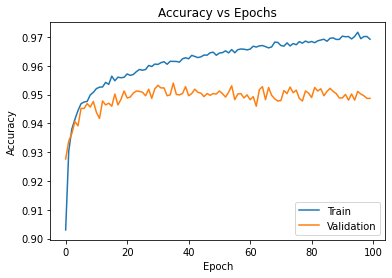

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
model_2.evaluate(X_test_scaled, y_test, verbose = 1)

885/885 [==============================] - 1s 1ms/step - loss: 0.1353 - accuracy: 0.9488


[0.13525506854057312, 0.9487532377243042]

In [ ]:
preddl2 = np.round(model_2.predict(X_test_scaled2)).astype('int')
preddl2[0:5]


1113/1113 [==============================] - 2s 1ms/step


array([[1],
       [1],
       [1],
       [0],
       [1]])

In [ ]:
# Deep Learning 2
pred = {}

# Let's initial the launch_dict with each value to be an empty list
pred['ID'] = ids
pred['Overall_Experience'] = list(np.concatenate(preddl2.tolist()). flat)


dt_preddl2=pd.DataFrame(pred)
print(dt_preddl2.head())

dt_preddl2.to_csv('Deep Learning 2.csv', index=False)

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


In [ ]:
# Clearing the backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
model_3 = Sequential()
model_3.add(Dense(256, activation='tanh', input_shape=(71,)))
model_3.add(Dropout(0.1))
model_3.add(Dense(128, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(64, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
model_3.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               18432     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [ ]:
history_3 = model_3.fit(X_train_scaled, 
                    y_train, 
                    validation_split=0.1, 
                    epochs=200,
                    verbose=2)

Epoch 1/200
1859/1859 - 8s - loss: 0.2131 - accuracy: 0.9089 - val_loss: 0.1707 - val_accuracy: 0.9245 - 8s/epoch - 4ms/step
Epoch 2/200
1859/1859 - 7s - loss: 0.1590 - accuracy: 0.9331 - val_loss: 0.1585 - val_accuracy: 0.9308 - 7s/epoch - 4ms/step
Epoch 3/200
1859/1859 - 5s - loss: 0.1412 - accuracy: 0.9401 - val_loss: 0.1435 - val_accuracy: 0.9411 - 5s/epoch - 3ms/step
Epoch 4/200
1859/1859 - 5s - loss: 0.1349 - accuracy: 0.9424 - val_loss: 0.1338 - val_accuracy: 0.9428 - 5s/epoch - 2ms/step
Epoch 5/200
1859/1859 - 5s - loss: 0.1271 - accuracy: 0.9461 - val_loss: 0.1250 - val_accuracy: 0.9435 - 5s/epoch - 3ms/step
Epoch 6/200
1859/1859 - 5s - loss: 0.1233 - accuracy: 0.9469 - val_loss: 0.1276 - val_accuracy: 0.9445 - 5s/epoch - 3ms/step
Epoch 7/200
1859/1859 - 6s - loss: 0.1190 - accuracy: 0.9489 - val_loss: 0.1273 - val_accuracy: 0.9435 - 6s/epoch - 3ms/step
Epoch 8/200
1859/1859 - 6s - loss: 0.1170 - accuracy: 0.9488 - val_loss: 0.1341 - val_accuracy: 0.9440 - 6s/epoch - 3ms/step


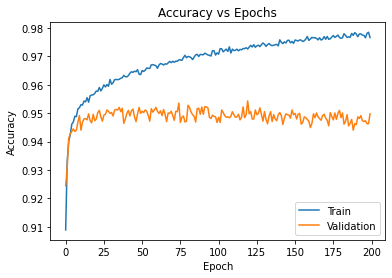

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
model_3.evaluate(X_test_scaled, y_test, verbose = 1)
preddl3 = np.round(model_3.predict(X_test_scaled2))

1113/1113 [==============================] - 3s 2ms/step


In [ ]:
# Deep Learning 3
pred = {}

# Let's initial the launch_dict with each value to be an empty list
pred['ID'] = ids
pred['Overall_Experience'] = list(np.concatenate(preddl3.tolist()). flat)

dt_preddl3=pd.DataFrame(pred)
print(dt_preddl3.head())

dt_preddl3.to_csv('Deep Learning 3.csv', index=False)

         ID  Overall_Experience
0  99900001                 1.0
1  99900002                 1.0
2  99900003                 1.0
3  99900004                 0.0
4  99900005                 1.0
